# Clients Exploration

The ClientId was extracted from the `payment` information available and saved as a CSV. The extraction process was performed at the `Data Exploration Payments` notebook.

In order to obtain more informations about the clients an API at the URL https://demo0192734.mockable.io/clientes/ is available. This API will provide the following informations:
    - clientId
    - nome (name)
    - cidade (city)
    - estado (state)
    - segmento (market segment)
    
This aditional information will allow us to better undestand how metrics (MRR, New MRR, ...) are spread across distinct cities/states and market segments.

In [11]:
import pandas as pd
import requests
import seaborn as sns

In [15]:
# Configuring plots

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
r = requests.get('https://demo0192734.mockable.io/clientes/')

In [3]:
r.status_code

200

The `GET` action was successful!

In [7]:
clientsResponse = r.json()
clientsResponse

[{'id': 0,
  'nome': 'Empresa 0',
  'cidade': 'Cachoeirinha',
  'estado': 'PE',
  'segmento': 'Confecção / Textil'},
 {'id': 1,
  'nome': 'Empresa 1',
  'cidade': 'Rio Doce',
  'estado': 'MG',
  'segmento': 'Cosméticos / Perfumaria / Higiene'},
 {'id': 2,
  'nome': 'Empresa 2',
  'cidade': 'Juquiá',
  'estado': 'SP',
  'segmento': 'Cosméticos / Perfumaria / Higiene'},
 {'id': 3,
  'nome': 'Empresa 3',
  'cidade': 'Vitória do Xingu',
  'estado': 'PA',
  'segmento': 'Confecção / Textil'},
 {'id': 4,
  'nome': 'Empresa 4',
  'cidade': 'Dueré',
  'estado': 'TO',
  'segmento': 'Eletrônicos / Eletrodomésticos'},
 {'id': 5,
  'nome': 'Empresa 5',
  'cidade': 'Três Barras',
  'estado': 'SC',
  'segmento': 'Móveis'},
 {'id': 6,
  'nome': 'Empresa 6',
  'cidade': 'Água Preta',
  'estado': 'PE',
  'segmento': 'Pet-Shop'},
 {'id': 7,
  'nome': 'Empresa 7',
  'cidade': 'Lajes',
  'estado': 'RN',
  'segmento': 'Áudio / Música / Som'},
 {'id': 8,
  'nome': 'Empresa 8',
  'cidade': 'Roque Gonzales',
 

As we can see above, the response returned by the API was a JSON with new information about each client. The `json()` method from the `requests.Response` object transformed the API response in a list of dictionaries. This is good because we can easily transform this information in a DataFrame

In [8]:
df_clients = pd.DataFrame(clientsResponse)

In [9]:
df_clients.head()

,id,nome,cidade,estado,segmento
0,0,Empresa 0,Cachoeirinha,PE,Confecção / Textil
1,1,Empresa 1,Rio Doce,MG,Cosméticos / Perfumaria / Higiene
2,2,Empresa 2,Juquiá,SP,Cosméticos / Perfumaria / Higiene
3,3,Empresa 3,Vitória do Xingu,PA,Confecção / Textil
4,4,Empresa 4,Dueré,TO,Eletrônicos / Eletrodomésticos


In [32]:
df_clients.rename({'id': 'ClientId'}, axis=1, inplace=True)

In [35]:
# The company name doesn't add new information
df_clients.drop('ClientId', axis=1, inplace=True)

## Analyzing the distribution of clients

### Clients per State

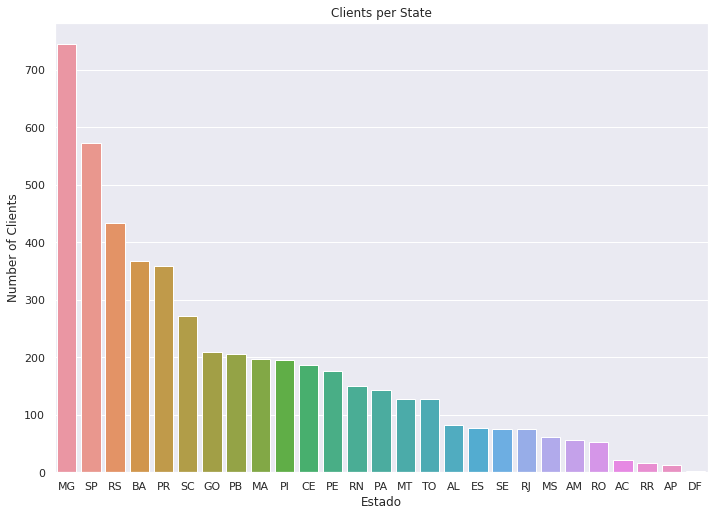

In [22]:
ax = sns.countplot(x='estado', data=df_clients, order=df_clients['estado'].value_counts().index)
ax.set(xlabel="Estado",
      ylabel="Number of Clients",
      title="Clients per State");

### Clients per Market Segment

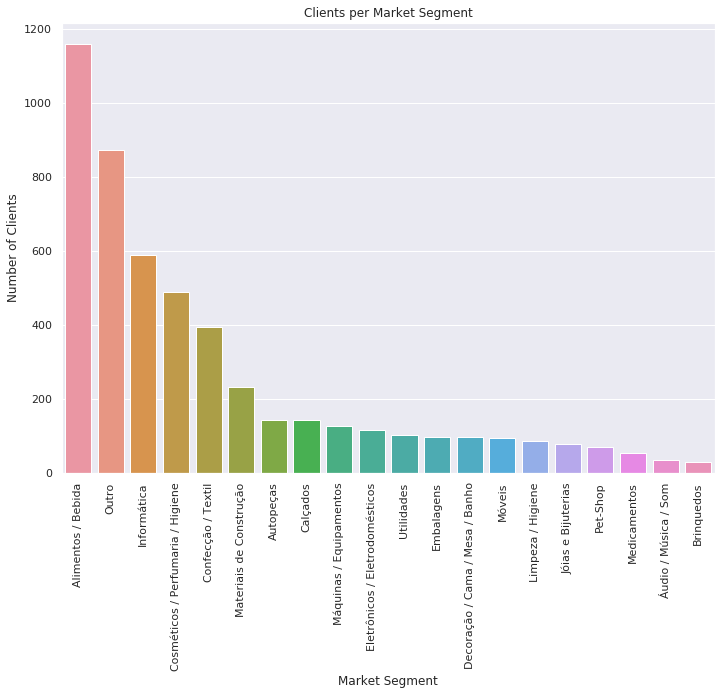

In [29]:
ax = sns.countplot(x='segmento', data=df_clients, order=df_clients['segmento'].value_counts().index)
ax.set(xlabel="Market Segment",
      ylabel="Number of Clients",
      title="Clients per Market Segment");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

We notice that the top 5 states are: MG, SP, RS, BA and PR. In the following image we can see the 5 states colored in dark green, from bottom to top they are: RS, PR, SP, MG and BA.

<img src="../img/Brazil.png">

### Saving the clients table

In [36]:
df_clients.to_csv('../data/clients.csv', index=False)